## Шаг 4: Exploratory Data Analysis (EDA)

Подгрузим библиотеки для визуализации данных и работы с графиками

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

In [8]:
#откроем датасет, сохраненный после парсинга данных
df = pd.read_csv('IMDbData.csv')
df

,Unnamed: 0,Movie Name,Year of Release,Runtime,Genre,Movie Rating,Metascore of Movie,Votes,Gross,Description
0,0,Guardians of the Galaxy Vol. 3,2023,150,"Action, Adventure, Comedy",8.2,64,156973,#158,"Still reeling from the loss of Gamora, Peter Q..."
1,1,John Wick: Chapter 4,2023,169,"Action, Crime, Thriller",8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...
2,2,Spider-Man: Across the Spider-Verse,2023,140,"Animation, Action, Adventure",9.1,86,50471,#16,"Miles Morales catapults across the Multiverse,..."
3,3,Guardians of the Galaxy,2014,121,"Action, Adventure, Comedy",8.0,76,1219591,$333.18M,A group of intergalactic criminals must pull t...
4,4,Avatar: The Way of Water,2022,192,"Action, Adventure, Fantasy",7.7,67,387792,$659.68M,Jake Sully lives with his newfound family form...
...,...,...,...,...,...,...,...,...,...,...
995,995,Anand,1971,122,"Drama, Musical",8.1,0,34431,NaN,The story of a terminally ill man who wishes t...
996,996,Airlift,2016,130,"Action, Drama, History",7.9,0,57859,NaN,"When Iraq invades Kuwait in August 1990, a cal..."
997,997,Все будет очень хорошо,1998,107,"Comedy, Drama, Thriller",8.1,0,26284,NaN,When Altan swipes prescription drugs from his ...
998,998,Дыхание: Да здравствует Отечество,2009,128,"Action, Drama, Thriller",8.0,0,34399,NaN,Story of 40-man Turkish task force who must de...


In [9]:
# Скопируем строки кода из пункта "Предварительная обработка данных" для того, чтобы перейти к Exploratory Data Analysis
# преобразуем переменный в числовой формат
df['Year of Release'] = df['Year of Release'].apply(int)
df['Runtime'] = df['Runtime'].apply(int)
df['Movie Rating'] = df['Movie Rating'].apply(float)
df['Metascore of Movie'] = df['Metascore of Movie'].apply(int)
df['Votes'] = df['Votes'].apply(int)
# преобразуем переменную Gross в числовой формат, предварительно убрав лишние данные, которые начинаются с "#"
df['Gross'] = df['Gross'].apply(lambda x: float(x.replace('$', '').replace('M', '').replace('#', '')) if isinstance(x, str) and x != '' else x)
df['Gross'] = df['Gross'].replace('', pd.NA)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
#Обработаем категориальную переменную жанр: преобразуем столбец в 3 столбца, по количеству жанров, описанных на сайте
df[['Genre 1', 'Genre 2']] = df['Genre']. str.split(',', 1 , expand= True )
df[['Genre 2', 'Genre 3']] = df['Genre 2']. str.split(',', 1 , expand= True )
df = df.drop('Genre', axis=1)
df.head()

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.00,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.00,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure
3,3,Guardians of the Galaxy,2014,121,8.0,76,1219591,333.18,A group of intergalactic criminals must pull t...,Action,Adventure,Comedy
4,4,Avatar: The Way of Water,2022,192,7.7,67,387792,659.68,Jake Sully lives with his newfound family form...,Action,Adventure,Fantasy


### Описательные статистики

Нам необходимо получить четкую картину о рапределении данных в датасете

Построим графики распределения переменных

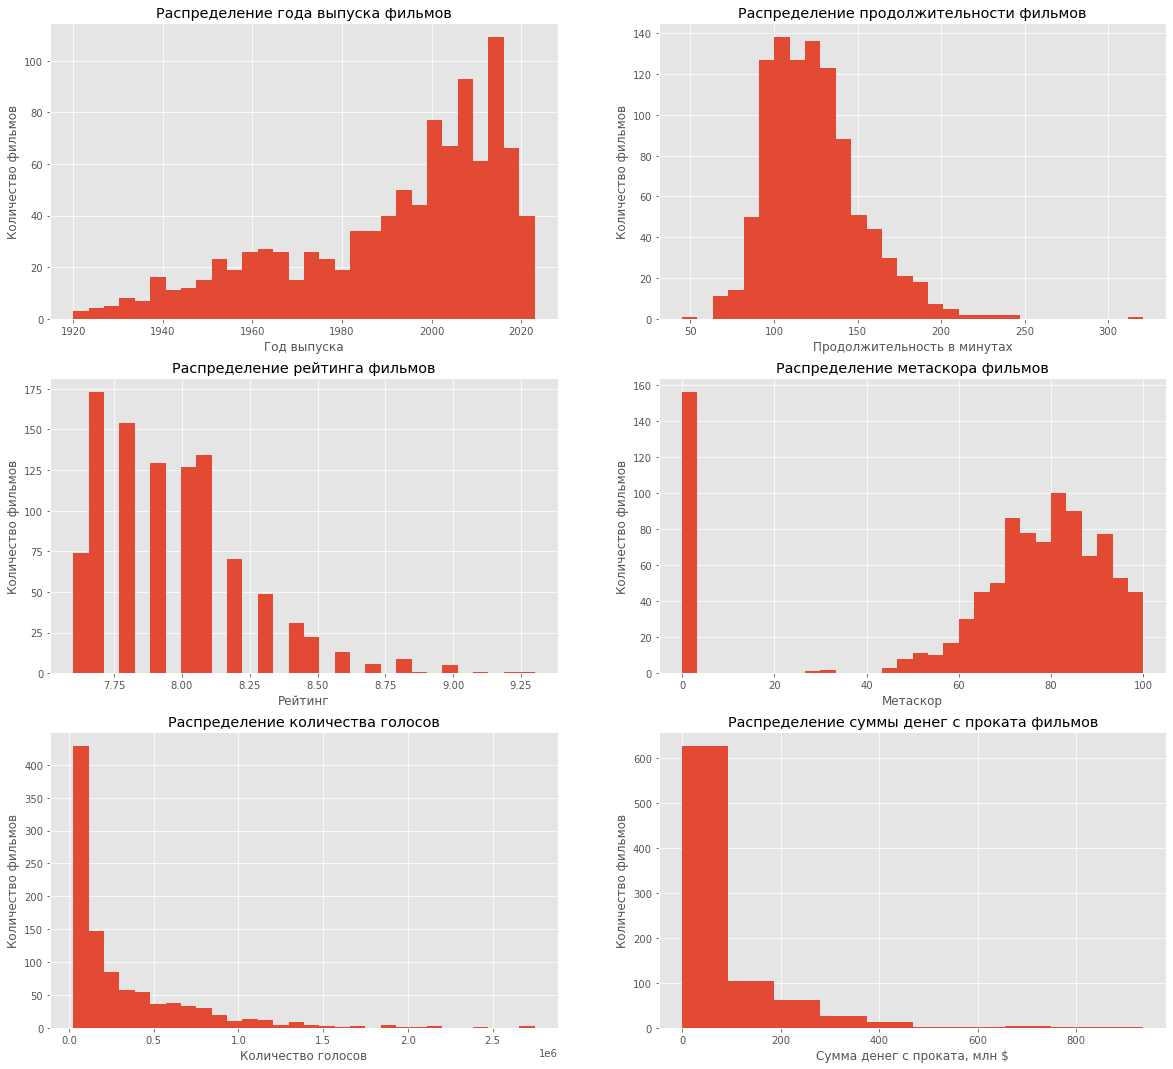

In [10]:
plt.figure(figsize=(20, 25))

sp = plt.subplot(421)
df['Year of Release'].hist(bins=30)
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.title('Распределение года выпуска фильмов');

sp = plt.subplot(422)
df['Runtime'].hist(bins=30)
plt.xlabel('Продолжительность в минутах')
plt.ylabel('Количество фильмов')
plt.title('Распределение продолжительности фильмов');

sp = plt.subplot(423)
df['Movie Rating'].hist(bins=30)
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.title('Распределение рейтинга фильмов');

sp = plt.subplot(424)
df['Metascore of Movie'].hist(bins=30)
plt.xlabel('Метаскор')
plt.ylabel('Количество фильмов')
plt.title('Распределение метаскора фильмов');

sp = plt.subplot(425)
df['Votes'].hist(bins=30)
plt.xlabel('Количество голосов')
plt.ylabel('Количество фильмов')
plt.title('Распределение количества голосов');

sp = plt.subplot(426)
df['Gross'].hist(bins=10)
plt.xlabel('Сумма денег с проката, млн $')
plt.ylabel('Количество фильмов')
plt.title('Распределение суммы денег с проката фильмов');


* Распределение года выпуска фильмов похоже на распределение с отклонением вправо. Это говорит о том, что в рейтинге преимущественно находятся фильмы 1990-2020 гг.
* Распределение продолжительности фильмов похоже на нормальное с медианой 120, средним 124. Большинство фильмов имеют длительность от 90 до 120 минут
* Распределение рейтинга фильмов похоже на распределение с отклонением влево
* Распределение метаскора фильма не похоже на типовое. 156 фильмов имеют метаскор 0
* Распределение количества голосов похоже на экспоненциальное распределение
* Распределение суммы денег с проката фильмов также похоже на экспоненциальное распределение с максимальным значением 936.66

Посмотрим на распредление жанров фильмов

In [11]:
# в столбцах Genre 1, Genre 2, Genre 3 находятся данные по жанрам фильмов, они могут повторяться. Соберем информацию по всем жанрам
numer = pd.concat([df['Genre 1'], df['Genre 2'], df['Genre 3']])
numer.dropna()
genre_counts = numer.dropna().str.strip().value_counts()
genre_counts

Drama        732
Comedy       230
Action       207
Crime        205
Adventure    190
Thriller     138
Romance      124
Biography    106
Mystery      103
Animation     84
Sci-Fi        67
Fantasy       62
Family        52
War           50
History       45
Horror        33
Music         31
Film-Noir     22
Western       17
Musical       16
Sport         15
dtype: int64

Построим график pie для распределения жанров

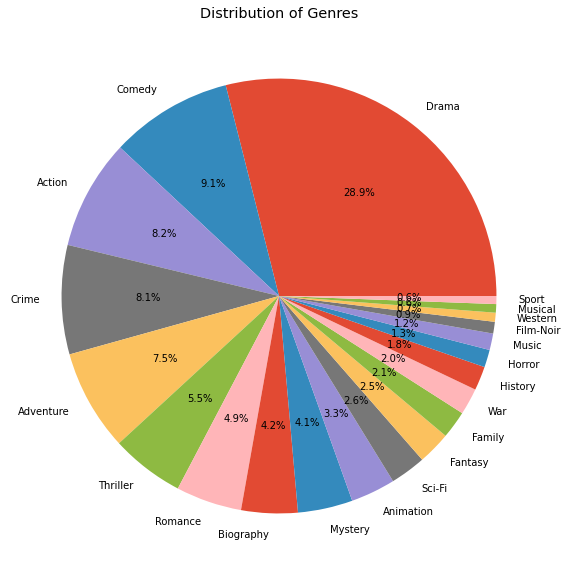

In [12]:
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Genres')
plt.show()

По графику видно, что наибольшую долю (28.9%) занимают Драмы. Далее идут Комедии (9.1%). Затем Боевики (8.2%)

Сделаем другой тип визуализации жанров с помощью treemap:

In [13]:
!pip install squarify
import squarify

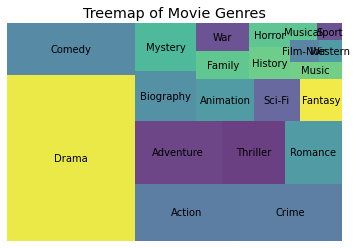

In [14]:
squarify.plot(sizes=genre_counts, label=genre_counts.index, alpha=0.8)
plt.axis('off')
plt.title('Treemap of Movie Genres')
plt.show()

Исследуем наиболее часто встречающиеся слова в описании к фильмам. Для этого построим word cloud:
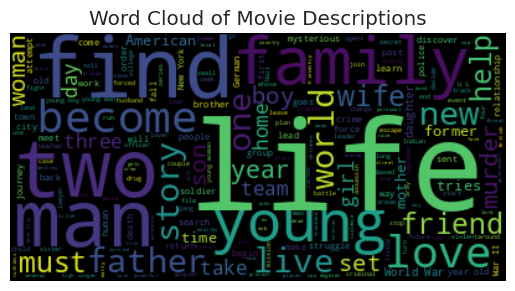

In [32]:
# Word cloud и круговая диаграмма:
# Создание word cloud для описания фильмов и визуализация наиболее часто встречающихся слов.
# Построение круговой диаграммы для переменных Genre 1, Genre 2, Genre 3 для отображения доли каждого жанра в общем наборе данных.
from wordcloud import WordCloud
from collections import Counter

# Word cloud для описания фильмов
description_text = ' '.join(df['Description'])
wordcloud = WordCloud().generate(description_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

ValueError: Only supported for TrueType fonts

Исследуем динамику рейтинга фильмов

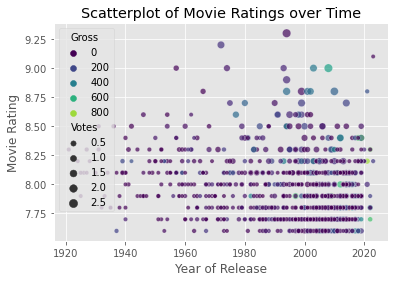

In [15]:
sns.scatterplot(data=df, x='Year of Release', y='Movie Rating', size='Votes', hue='Gross', palette = "viridis", alpha=0.7)
plt.xlabel('Year of Release')
plt.ylabel('Movie Rating')
plt.title('Scatterplot of Movie Ratings over Time')
plt.show()

На представленной диаграмме размер точек зависит от количества голосов (Votes), а цвет точек - от кассовых сборов (Gross). По графику видно, что начиная с 1970 года все больше фильмов стали получать рейтинг 8.5 и выше

Продолжаем исследовать метрики фильмов в динамике

Построим график, показывающий суммарную выручку фильмов по годам

<AxesSubplot:xlabel='Year of Release'>

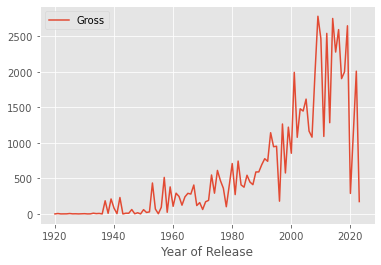

In [16]:
revenue_df = df[['Gross'] + ['Year of Release']]
revenue_df.groupby('Year of Release').sum().plot()

По графику видно, что в 1994-96 годах выручка была минимальной, как и в 2020 году

Рассмотрим динамику рейтинга фильмов в зависимости от года выпуска

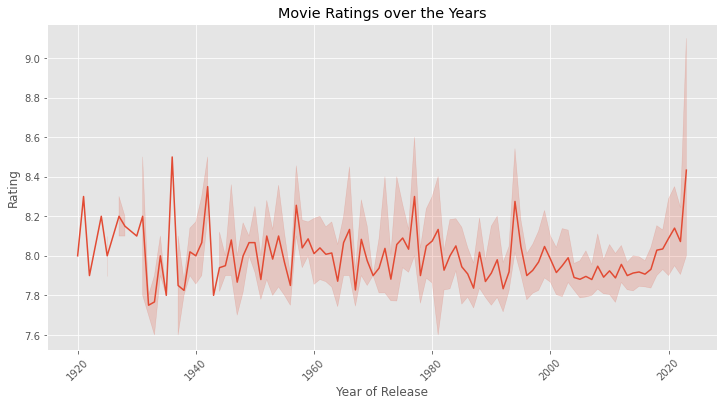

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year of Release', y='Movie Rating')
plt.title('Movie Ratings over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

На графике четко прослеживаются пики высоких рейтингов фильмов, выпущенных в 1935-1938, 1941-1942, 1997-1998, 2020-2023

### Зависимости переменных и взаимосвязи

Далее будем смотреть на зависимости между переменными. Это позволит нам сделать микро-выводы по данным и выдвинуть гипотезы

In [18]:
df.corr()

,Unnamed: 0,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross
Unnamed: 0,1.000000,-0.282037,-0.147279,-0.174157,-0.415489,-0.700249,-0.470716
Year of Release,-0.282037,1.000000,0.216028,-0.076231,-0.079054,0.239524,0.226248
Runtime,-0.147279,0.216028,1.000000,0.270322,-0.076205,0.158828,0.134373
Movie Rating,-0.174157,-0.076231,0.270322,1.000000,-0.048196,0.478036,0.124132
Metascore of Movie,-0.415489,-0.079054,-0.076205,-0.048196,1.000000,0.240386,0.111703
Votes,-0.700249,0.239524,0.158828,0.478036,0.240386,1.000000,0.545041
Gross,-0.470716,0.226248,0.134373,0.124132,0.111703,0.545041,1.000000


Построим heatmap для визуализации корреляций между числовыми переменными

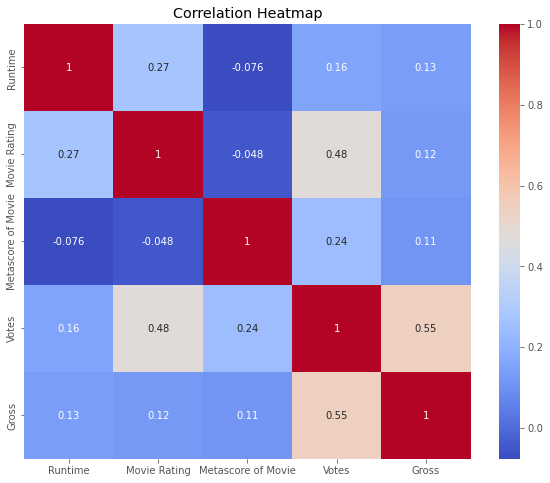

In [19]:
corr_matrix = df[['Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes', 'Gross']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

По корреляционной матрице видна наибольшая положительная связь переменных Votes и Gross 0.55

Построим pairplot (диаграммы рассеяния) для признаков: Runtime, Movie Rating, Metascore of Movie, Votes, Gross, Year of Release

<Figure size 864x432 with 0 Axes>

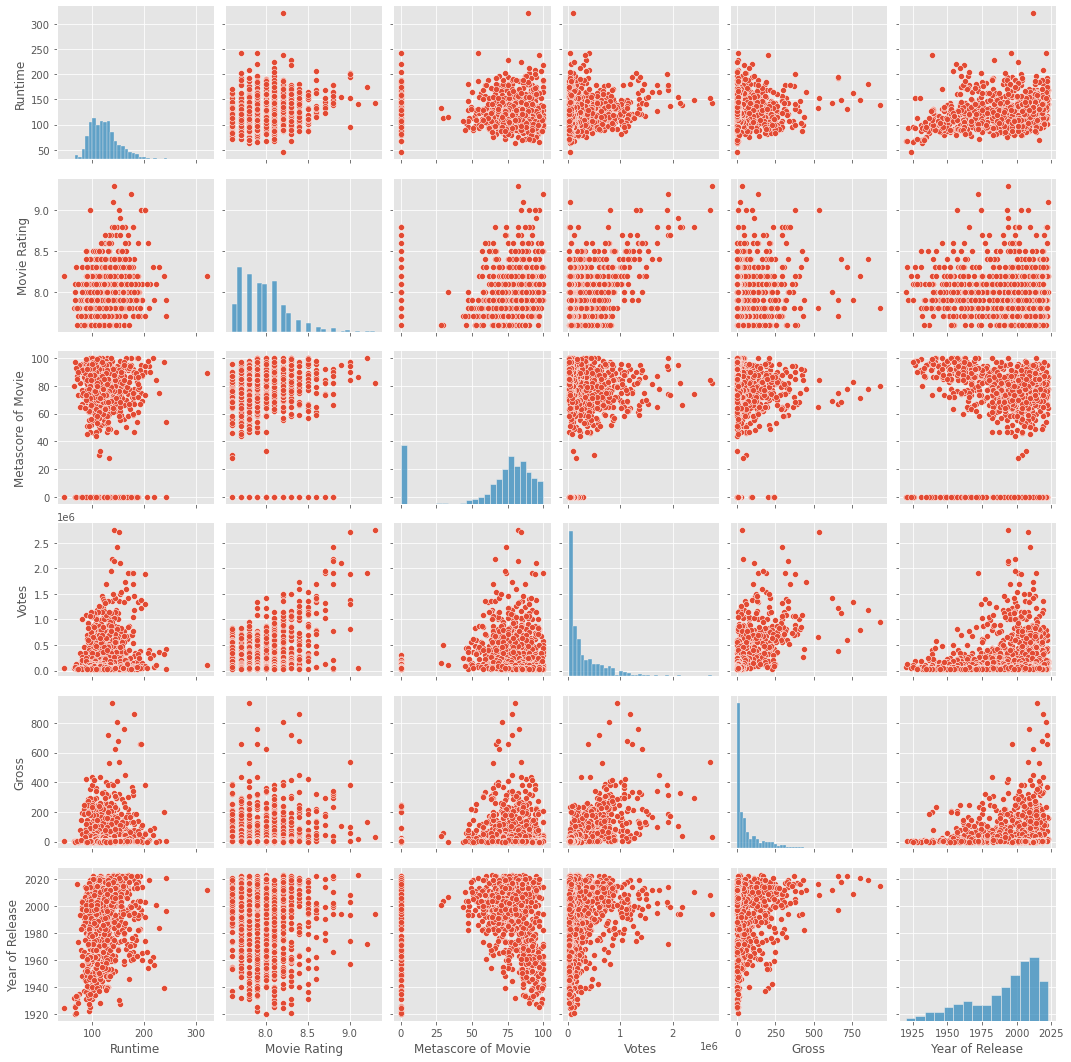

In [20]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Runtime', 'Movie Rating', 'Metascore of Movie', 'Votes', 'Gross', 'Year of Release']])
plt.show()

По графикам мы можем увидеть положительную связь переменных Gross и Votes, Movie Rating и Votes. Также мы можем сделать вывод, что наибольшим значениям Metascore соответсвуют наименьшие занчения Votes и Gross

Далее посмотрим на то, какие жанры были популярны в разные периоды времени. Для этого построим heatmap с группировкой по жанрам и годам.

In [21]:
genre_counts_1 = pd.DataFrame({
    'genre': genre_counts.index,
    'count': genre_counts.values
})

genre_counts_1

,genre,count
0,Drama,732
1,Comedy,230
2,Action,207
3,Crime,205
4,Adventure,190
5,Thriller,138
6,Romance,124
7,Biography,106
8,Mystery,103
9,Animation,84


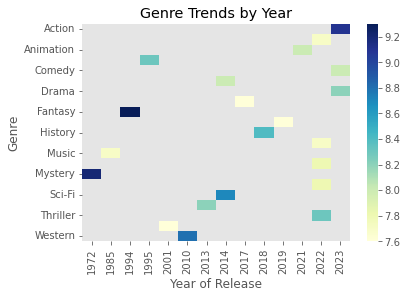

In [22]:
genre_year_matrix = df.pivot_table(index=genre_counts_1['genre'], columns='Year of Release', values='Movie Rating')

sns.heatmap(genre_year_matrix, cmap='YlGnBu')
plt.xlabel('Year of Release')
plt.ylabel('Genre')
plt.title('Genre Trends by Year')
plt.show()

По графику видно, что наиболее популярными, например, в 2023 году жанры Боевика, Комедии и Драмы. В то время, как Фэнтэзи наиболее популярный жанр в 1994 году

## Шаг 5. Создание новых признаков

Создадим признак, который принимает значение количества символов в описании фильма (длина описания)

In [23]:
df['Description length'] = df['Description'].apply(lambda x: len(str(x)))
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy,183
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller,214
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure,235


Сделаем визуализацию длины описания

<AxesSubplot:xlabel='Description length', ylabel='Count'>

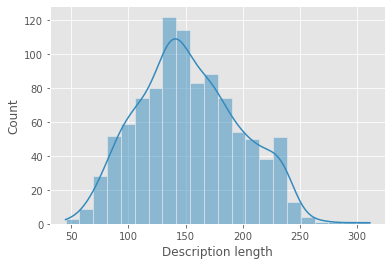

In [24]:
sns.histplot(data=df, x='Description length', kde=True)

Распределение длины описания похоже на нормальное распределение

Создадим новый признак "Decade", в котором хранятся данные о десятилетии, в котором был выпущен фильм

In [25]:
# Разделение года выпуска на декады
df['Decade'] = (df['Year of Release'] // 10) * 10
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length,Decade
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy,183,2020
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller,214,2020
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure,235,2020


Построим график распределения десятилетий, в которые был выпущен фильм

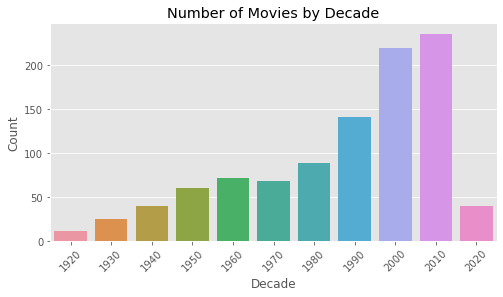

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Decade')
plt.title('Number of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

По графику видно, что больше всего топовые фильмы были выпущены в 90-е, 2000-е и 2010-е годы

Создадим следующую переменную успешности фильма. Присвоим значение 1, если кассовость фильма больше 200 млн долларов и рейтинг больше 8, 0 - иначе


In [27]:
df['Success'] = ((df['Gross'] > 200) & (df['Movie Rating'] > 8)).astype(int)
df.head(3)

,Unnamed: 0,Movie Name,Year of Release,Runtime,Movie Rating,Metascore of Movie,Votes,Gross,Description,Genre 1,Genre 2,Genre 3,Description length,Decade,Success
0,0,Guardians of the Galaxy Vol. 3,2023,150,8.2,64,156973,158.0,"Still reeling from the loss of Gamora, Peter Q...",Action,Adventure,Comedy,183,2020,0
1,1,John Wick: Chapter 4,2023,169,8.0,78,190955,NaN,John Wick uncovers a path to defeating The Hig...,Action,Crime,Thriller,214,2020,0
2,2,Spider-Man: Across the Spider-Verse,2023,140,9.1,86,50471,16.0,"Miles Morales catapults across the Multiverse,...",Animation,Action,Adventure,235,2020,0


In [28]:
df['Success'].value_counts()

0    953
1     47
Name: Success, dtype: int64

Всего "успешных" фильмов 47

Построим график доли успешных фильмов

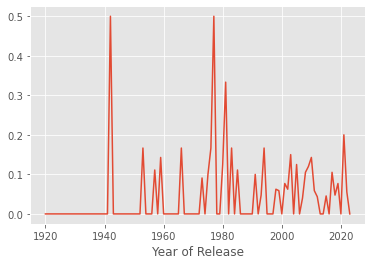

In [29]:
df.groupby('Year of Release')['Success'].mean().plot()
plt.show()

Данный график показывает, как менялась доля успешных фильмов (согласно определению признака Success) в зависимости от года выпуска. Если среднее значение признака Success для конкретного года выше, то это означает, что в этом году было выпущено больше успешных фильмов.

Следующий признак, который мы создадим - наличие слова life в описании фильма. Ранее мы выявили, что слово life чаще всего встречается в описании фильмов. Возможно это влияет на рейтинг фильма, или его кассовость. Присвоим значение 1, если слово life встречается в описании фильма, 0 - иначе

In [30]:
df['Life_in_Description'] = df.apply(lambda row: 1 if 'life' in str(row['Description']).lower() else 0, axis=1)
df['Life_in_Description'].value_counts()

0    884
1    116
Name: Life_in_Description, dtype: int64

Итого, 116 фильмов, которые в описании содержат слово life.

График распределения фильмов со словом life в описании по годам

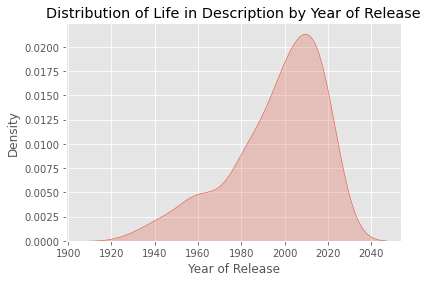

In [31]:
sns.kdeplot(df[df['Life_in_Description']==1]['Year of Release'], shade=True, label='Life in Description')
plt.title('Distribution of Life in Description by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Density')
plt.show()

Видим, что чаще всего слово life использовалось в описании фильмов с 2000-2020

Таким образом, мы создали еще 4 новых признака:
- `Description lenght` - количество символов в описании фильма
- `Decade` - десятилетие выпуска фильма
- `Success` - успешность фильма
- `Life_in_Description` - наличие слова life в описании фильма